# Environment and file preparation
Source illustration: codes of cell 2 to 7 are from "Assignment2_example"(https://github.com/fedhere/PUI2018_fb55/blob/master/HW3_fb55/Assignment2_example.ipynb)

In [1]:
from __future__ import print_function #for compatibility beteen python2 and python3

In [2]:
import os
puidata = os.getenv("PUIDATA")
if puidata is None:
    puidata=os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

In [3]:
!curl https://data.cityofnewyork.us/api/views/j34j-vqvt/rows.csv?accessType=DOWNLOAD > FDNY.csv 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  204k    0  204k    0     0   391k      0 --:--:-- --:--:-- --:--:--  391k


In [4]:
# move the data
!mv FDNY.csv $PUIDATA

In [5]:
#test if the data is there
!ls $PUIDATA

201801-citibike-tripdata.csv
201801-citibike-tripdata.csv.zip
201807-citibike-tripdata.csv
201807-citibike-tripdata.csv.zip
FDNY.csv
file2.gz
file.gz
geo_export_26989e58-27fd-4c19-b783-3394cd4ad659.dbf
geo_export_26989e58-27fd-4c19-b783-3394cd4ad659.prj
geo_export_26989e58-27fd-4c19-b783-3394cd4ad659.shp
geo_export_26989e58-27fd-4c19-b783-3394cd4ad659.shx
ZIP_CODE_040114.dbf
ZIP_CODE_040114.prj
ZIP_CODE_040114.sbn
ZIP_CODE_040114.sbx
ZIP_CODE_040114.shp
ZIP_CODE_040114.shp.xml
ZIP_CODE_040114.shx


In [6]:
#read in the data with pandas
import pandas as pd
FDNY = pd.read_csv("%s/FDNY.csv"%os.getenv("PUIDATA"))

# Data Check_1st

In [7]:
#print the fist 7 lines out
FDNY.head(7)

YEARMONTH        INCIDENTCLASSIFICATION INCIDENTBOROUGH  INCIDENTCOUNT  \
0   2009/07  All Fire/Emergency Incidents        Citywide          40850   
1   2009/07  All Fire/Emergency Incidents       Manhattan          10709   
2   2009/07  All Fire/Emergency Incidents           Bronx           8137   
3   2009/07  All Fire/Emergency Incidents   Staten Island           2205   
4   2009/07  All Fire/Emergency Incidents        Brooklyn          11505   
5   2009/07  All Fire/Emergency Incidents          Queens           8294   
6   2009/07                   False Alarm        Citywide           2655   

  AVERAGERESPONSETIME  
0               04:27  
1               04:32  
2               04:37  
3               04:45  
4               04:01  
5               04:43  
6               04:07

# Data cleaning

In [8]:
#delete all but 2 columns:
FDNY_1=FDNY.drop(['YEARMONTH','INCIDENTCLASSIFICATION', 'INCIDENTBOROUGH'],axis=1)

In [9]:
FDNY_1.head()

INCIDENTCOUNT AVERAGERESPONSETIME
0          40850               04:27
1          10709               04:32
2           8137               04:37
3           2205               04:45
4          11505               04:01

In [10]:
#delete last invalid 336 rows:
for i in range(336):
    FDNY_1=FDNY_1.drop(FDNY_1.index[[4032]])

    
#delete other invalid rows:
j=0
for i in range(4032):
    if i%42==0:
        j=j+1
    else:
        FDNY_1=FDNY_1.drop(FDNY_1.index[[j]])

In [11]:
#Conversion time format:
def ts(t):
    m,s = t.strip().split(":")
    return int(m) * 60 + int(s)

k=0
for i in range (96):
    k=(i)*42
    FDNY_1.AVERAGERESPONSETIME[k]=ts(FDNY_1.AVERAGERESPONSETIME[k])

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Data Check_2st

In [12]:
#FDNY_1

# Data plot

Populating the interactive namespace from numpy and matplotlib


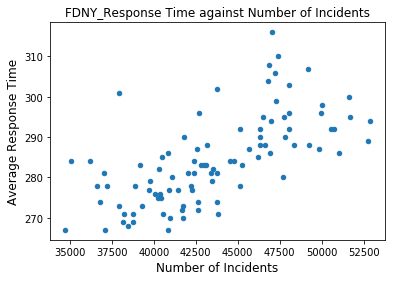

In [13]:
#scatter
%pylab inline
ax=FDNY_1.plot(x='INCIDENTCOUNT',y='AVERAGERESPONSETIME',kind='scatter')
ax.set_xlabel("Number of Incidents",fontsize=12)
ax.set_ylabel("Average Response Time",fontsize=12);
ax.set_title("FDNY_Response Time against Number of Incidents",fontsize=12);